# Використання Pandas для аналізу даних

## Мета: Вивчення основних функцій Pandas для аналізу даних.

1. Виведіть перші 8 рядків набору даних.

In [7]:
import pandas as pd
names_table = pd.read_csv('NationalNames.csv')
print(names_table.iloc[0:8])

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


3. Отримайте імена стовпців набору даних

In [10]:
import pandas as pd
names_table = pd.read_csv('NationalNames.csv')
print(names_table.columns)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі
даних

In [11]:
import pandas as pd
names_table = pd.read_csv('NationalNames.csv')
unique_names_by_gender = names_table.groupby('Gender')['Name'].nunique()
print(unique_names_by_gender)

Gender
F    64911
M    39199
Name: Name, dtype: int64


7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році

In [23]:
import pandas as pd

names_table = pd.read_csv('NationalNames.csv') 
male_names_2010 = names_table[(names_table['Year'] == 2010) & (names_table['Gender'] == 'M')]
top_5_male_names_2010 = male_names_2010.sort_values(by='Count', ascending=False).head(5)
print(top_5_male_names_2010)

              Id     Name  Year Gender  Count
1677392  1677393    Jacob  2010      M  22082
1677393  1677394    Ethan  2010      M  17985
1677394  1677395  Michael  2010      M  17308
1677395  1677396   Jayden  2010      M  17152
1677396  1677397  William  2010      M  17030


8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого
Count максимальне)

In [33]:
import pandas as pd

names_table = pd.read_csv('NationalNames.csv') 
most_popular = names_table[names_table['Count'] == names_table['Count'].max()]
print(f"The name is {most_popular['Name'].values[0]} in {most_popular['Year'].values[0]}")

The name is Linda in 1947


12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен

In [8]:
import pandas as pd

names_table = pd.read_csv('NationalNames.csv') 
unique_names = names_table.groupby('Year')['Name'].nunique().reset_index()
unique_year = unique_names.loc[unique_names['Name'].idxmax()]['Year']
unique_year_data = names_table[names_table['Year'] == unique_year]
most_popular_name = unique_year_data[unique_year_data['Count'] == unique_year_data['Count'].max()]
print(most_popular_name['Name'].values[0], most_popular_name['Year'].values[0])

Jacob 2008


13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен

In [18]:
import pandas as pd

names_table = pd.read_csv('NationalNames.csv') 
female_jacob_names = names_table[(names_table['Gender'] == 'F') & (names_table['Name'] == 'Jacob')]
year_of_jacob = female_jacob_names.sort_values(by='Count', ascending=False).head(1)
print(year_of_jacob)

              Id   Name  Year Gender  Count
1455556  1455557  Jacob  2004      F    171


14. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)

In [72]:
import pandas as pd

def count_neutral_names(row):
    return len(set(row['Name_Male']).intersection(row['Name_Female']))

names_table = pd.read_csv('NationalNames.csv')
male_names = names_table[names_table['Gender'] == 'M'].groupby('Year')['Name'].unique().reset_index()
female_names = names_table[names_table['Gender'] == 'F'].groupby('Year')['Name'].unique().reset_index()
merged_names = pd.merge(male_names, female_names, on='Year', suffixes=('_Male', '_Female'))
merged_names['Neutral_Names_Count'] = merged_names.apply(count_neutral_names, axis=1)
neutral_year = merged_names.loc[merged_names['Neutral_Names_Count'].idxmax()]
print(f"The year is {neutral_year['Year']} with {neutral_year['Neutral_Names_Count']} gender neutral names")

The year is 2008 with 2557 gender neutral names


15. Знайдіть загальну кількість народжень за рік.

In [1]:
import pandas as pd

names_table = pd.read_csv('NationalNames.csv')
births_per_year = names_table.groupby('Year')['Count'].sum().reset_index()
print(births_per_year)

     Year    Count
0    1880   201484
1    1881   192699
2    1882   221538
3    1883   216950
4    1884   243467
..    ...      ...
130  2010  3686589
131  2011  3646730
132  2012  3643336
133  2013  3626802
134  2014  3670151

[135 rows x 2 columns]


16. Знайдіть рік, коли народилося найбільше дітей

In [2]:
import pandas as pd

names_table = pd.read_csv('NationalNames.csv')
births_per_year = names_table.groupby('Year')['Count'].sum().reset_index()
biggest_year = births_per_year.sort_values(by='Count', ascending=False).head(1)
print(biggest_year)

    Year    Count
77  1957  4200026


17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [4]:
import pandas as pd

names_table = pd.read_csv('NationalNames.csv')
births_per_year_gender = names_table.groupby(['Year', 'Gender'])['Count'].sum().unstack().reset_index()
print(births_per_year_gender)

Gender  Year        F        M
0       1880    90993   110491
1       1881    91954   100745
2       1882   107850   113688
3       1883   112321   104629
4       1884   129022   114445
..       ...      ...      ...
130     2010  1772738  1913851
131     2011  1753500  1893230
132     2012  1753922  1889414
133     2013  1745339  1881463
134     2014  1768775  1901376

[135 rows x 3 columns]


19. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

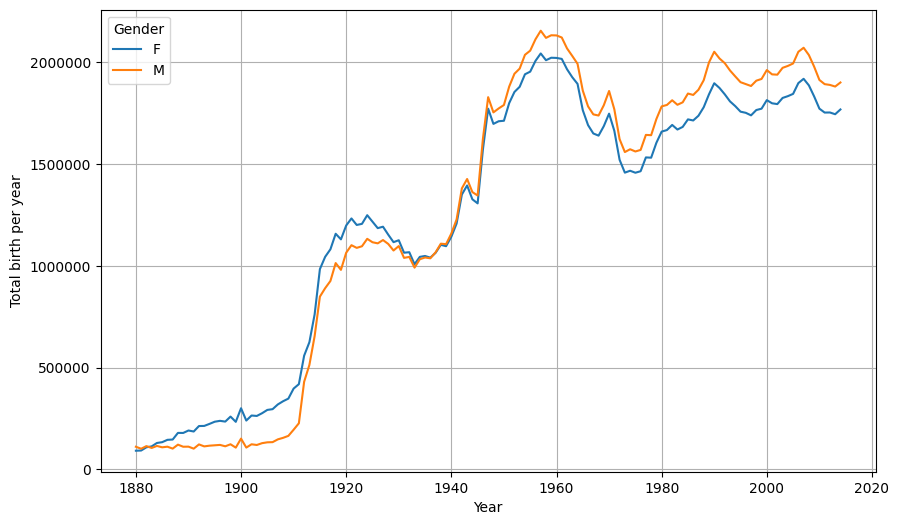

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

names_table = pd.read_csv('NationalNames.csv')
births_per_year_gender = names_table.groupby(['Year', 'Gender'])['Count'].sum().unstack().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(births_per_year_gender['Year'], births_per_year_gender['F'], label='F')
plt.plot(births_per_year_gender['Year'], births_per_year_gender['M'], label='M')
plt.xlabel('Year')
plt.ylabel('Total birth per year')
plt.legend(title='Gender')
plt.grid(True)
plt.ticklabel_format(axis='y', style='plain')
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

20. Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців)

In [24]:
import pandas as pd

names_table = pd.read_csv('NationalNames.csv')
male_names = set(names_table[names_table['Gender'] == 'M']['Name'])
female_names = set(names_table[names_table['Gender'] == 'F']['Name'])
neutral_names_count = len(male_names.intersection(female_names))
print("Total Neutral Names in the dataset:", neutral_names_count)

Total Neutral Names in the dataset: 10221


22. Підрахуйте скільки років проводилось спостереження

In [27]:
import pandas as pd

names_table = pd.read_csv('NationalNames.csv')
years = names_table.groupby('Year')['Name'].unique().reset_index()
print(len(years))

135


24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів )

In [8]:
import pandas as pd


names_table = pd.read_csv('NationalNames.csv')
lowest_count = names_table['Count'].min()
unpopular_names = names_table[names_table['Count'] == lowest_count]
unpopular_names = unpopular_names.groupby('Name')['Count'].sum().reset_index()
popular_unpopular = unpopular_names.sort_values(by='Count', ascending=False).head(1)
print(popular_unpopular)

           Name  Count
12207  Celester    160


25. Побудувати графіки розподілення кількості імен John та Mary по роках
без залежності до статі.

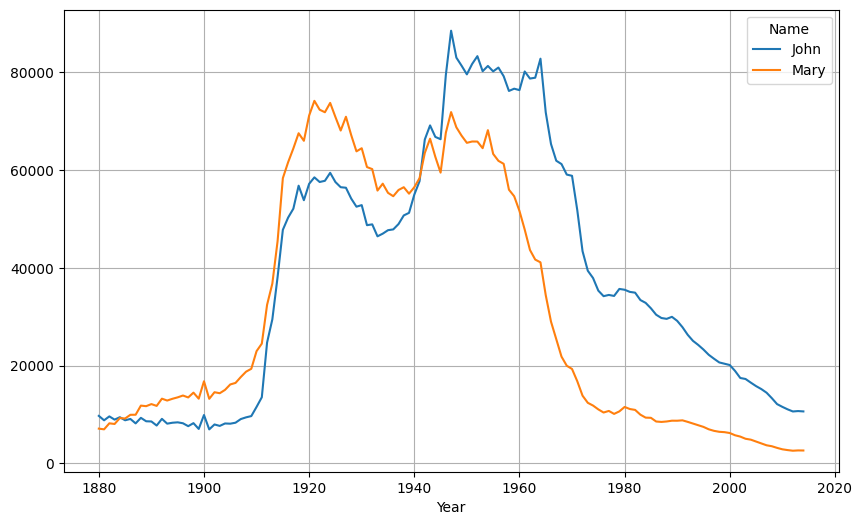

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

names_table = pd.read_csv('NationalNames.csv')
john_data = names_table[(names_table['Name'] == 'John')]
mary_data = names_table[(names_table['Name'] == 'Mary')]
john_count_by_year = john_data.groupby('Year')['Count'].sum()
mary_count_by_year = mary_data.groupby('Year')['Count'].sum()
plt.figure(figsize=(10, 6))
plt.plot(john_count_by_year.index, john_count_by_year.values, label='John')
plt.plot(mary_count_by_year.index, mary_count_by_year.values, label='Mary')
plt.xlabel('Year')
plt.legend(title='Name')
plt.grid(True)

plt.show()


26. Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.

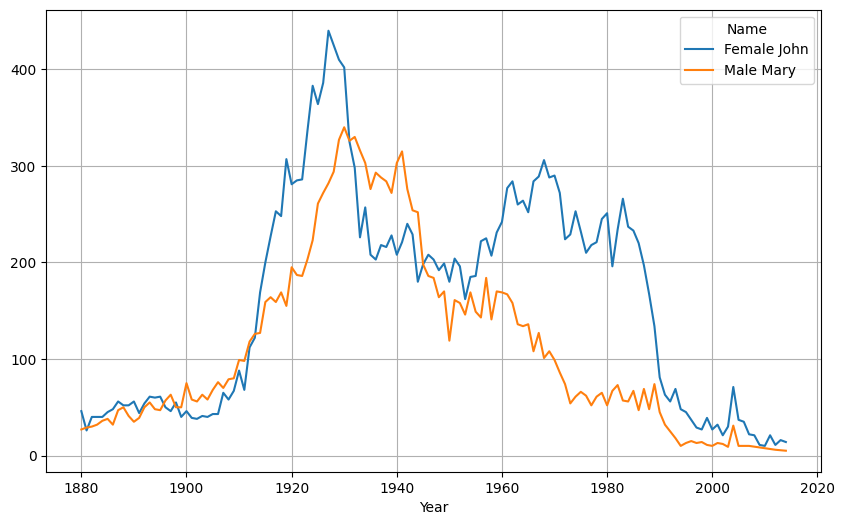

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

names_table = pd.read_csv('NationalNames.csv')
female_john_data = names_table[(names_table['Name'] == 'John') & (names_table['Gender'] == 'F')]
male_mary_data = names_table[(names_table['Name'] == 'Mary') & (names_table['Gender'] == 'M')]
female_john_count_by_year = female_john_data.groupby('Year')['Count'].sum()
male_mary_count_by_year = male_mary_data.groupby('Year')['Count'].sum()
plt.figure(figsize=(10, 6))
plt.plot(female_john_count_by_year.index, female_john_count_by_year.values, label='Female John')
plt.plot(male_mary_count_by_year.index, male_mary_count_by_year.values, label='Male Mary')
plt.xlabel('Year')
plt.legend(title='Name')
plt.grid(True)

plt.show()


27. Знайти найпопулярніші імена в кожному році.

In [15]:
import pandas as pd

names_table = pd.read_csv('NationalNames.csv')
popular_names_by_year = names_table.groupby(['Year', 'Name'])['Count'].sum().reset_index()
idx = popular_names_by_year.groupby('Year')['Count'].idxmax()
most_popular_names = popular_names_by_year.loc[idx]
print(most_popular_names)

         Year      Name  Count
955      1880      John   9701
2818     1881      John   8795
4735     1882      John   9597
6727     1883      John   8934
8775     1884      John   9428
...       ...       ...    ...
1521288  2010  Isabella  22913
1568092  2011    Sophia  21839
1599369  2012    Sophia  22285
1630271  2013    Sophia  21172
1643629  2014      Emma  20811

[135 rows x 3 columns]
